# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :


* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data

In [14]:
import warnings
warnings.filterwarnings("ignore")
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6720,0.274592,-0.017784,-0.111408,-0.995499,-0.993841,-0.991293,-0.996217,-0.994325,-0.991167,-0.940869,...,0.556491,0.055955,-0.848992,-0.614981,0.466023,-0.564151,-0.428596,29,6,LAYING


In [15]:
train.shape

(7352, 564)

## Obtain the  test data

In [16]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
161,0.272731,-0.028276,-0.127075,-0.996193,-0.965002,-0.934025,-0.996832,-0.966735,-0.92583,-0.942432,...,0.007623,0.030307,0.084313,-0.405843,-0.62681,0.328433,-0.09861,2,5,STANDING


# Data Cleaning

## 1. Check for Duplicates

In [17]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [18]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

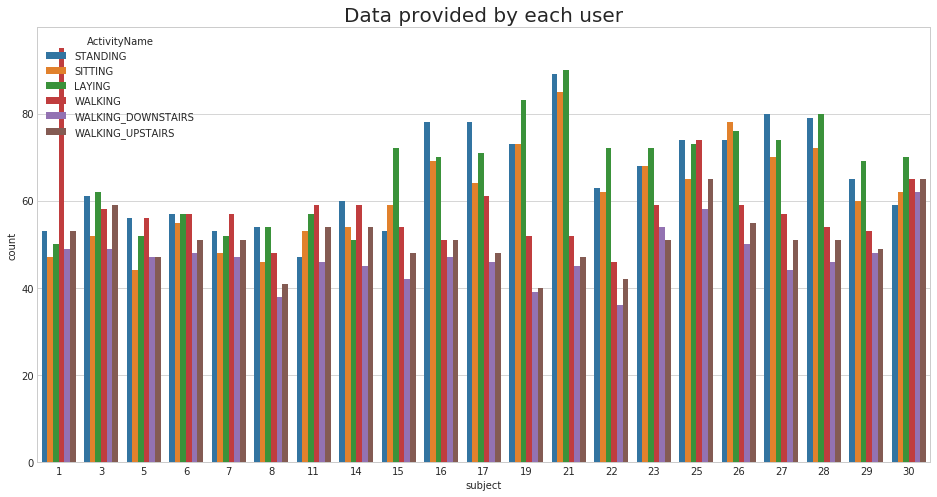

In [20]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


### Observations
     1. We have got almost same number of reading from all the subjects

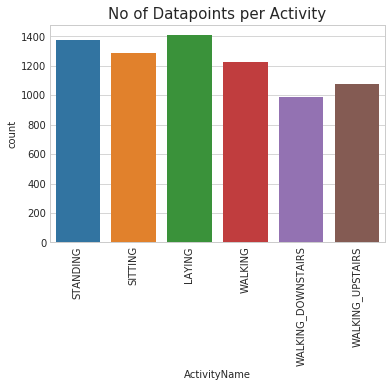

In [21]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
    1. Our data is well balanced (almost)

## 4. Changing feature names

In [22]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [23]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 



+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

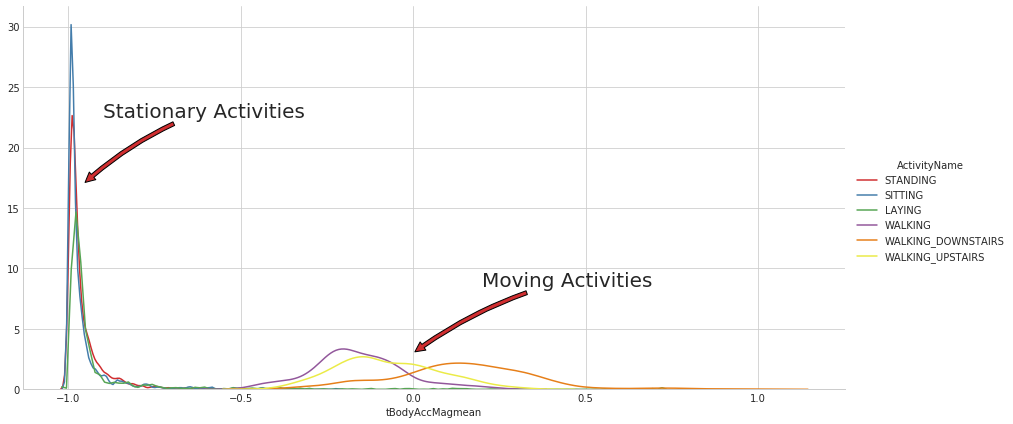

In [29]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

### Observation
    1. We can easily distinguish between stationary and moving activities

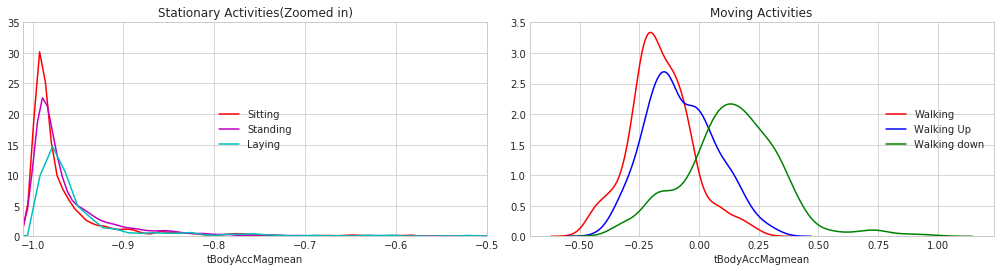

In [30]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### observation
    1. Here we plotted the previous graph seperately to understand it more lucidly.

### 3. Magnitude of an acceleration can seperate it well

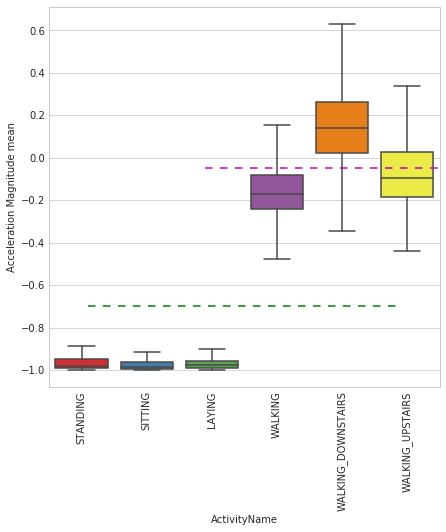

In [31]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

### Observations
    1. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
    2. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
    3. If tAccMean > 0.0 then the Activity is WalkingDownstairs.
    4. We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponents also matters 

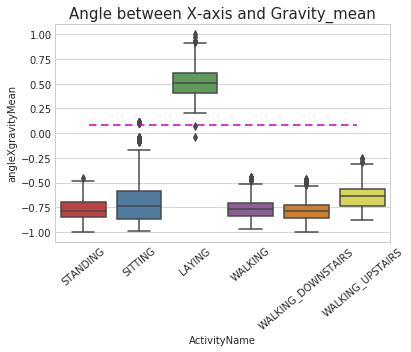

In [32]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### Observations:
    1. If angleX,gravityMean > 0 then Activity is Laying.
    2. We can classify all datapoints belonging to Laying activity with just a single if else statement.

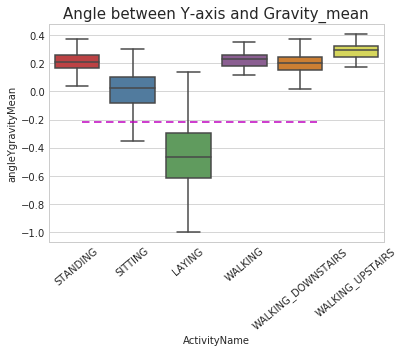

In [33]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

### Observations:
    1. If angleY,gravityMean < -0.2 then Activity is Laying.
    2. We can classify all datapoints belonging to Laying activity with just a single if else statement.

### Pair plot

<Figure size 1080x360 with 0 Axes>

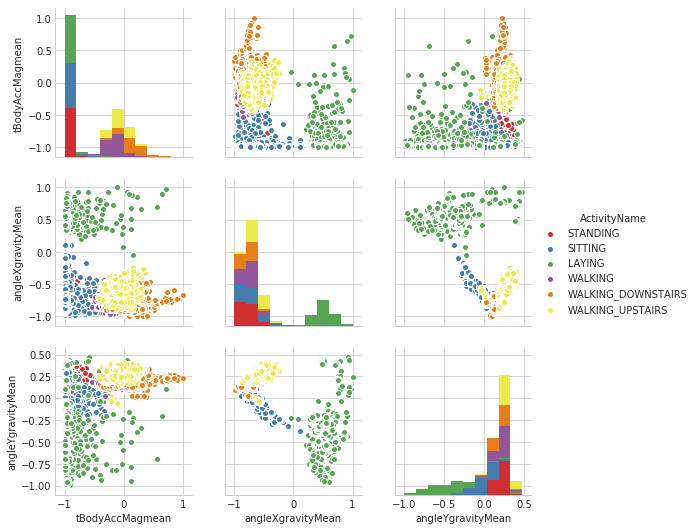

In [38]:
n = train.shape[0]
plt.figure(figsize=(15,5))
sns.pairplot(train[['tBodyAccMagmean', 'angleXgravityMean','angleYgravityMean','ActivityName']][0:n], hue='ActivityName', vars=['tBodyAccMagmean', 'angleXgravityMean','angleYgravityMean'])
plt.show()

### Observations
    1. We find that the laying is easily seperable using anglexgravitymean and angleygravitymean.
    2. We find  that walking downstairs is also easily seperable.

# Apply t-sne on the data 

In [25]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.485s...
[t-SNE] Computed neighbors for 7352 samples in 41.483s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 124.6934052, gradient norm = 0.0278058 (50 iterations in 7.823s)
[t-SNE] Iteration 100: error = 106.9610519, gradient norm = 0.0268003 (50 iterations in

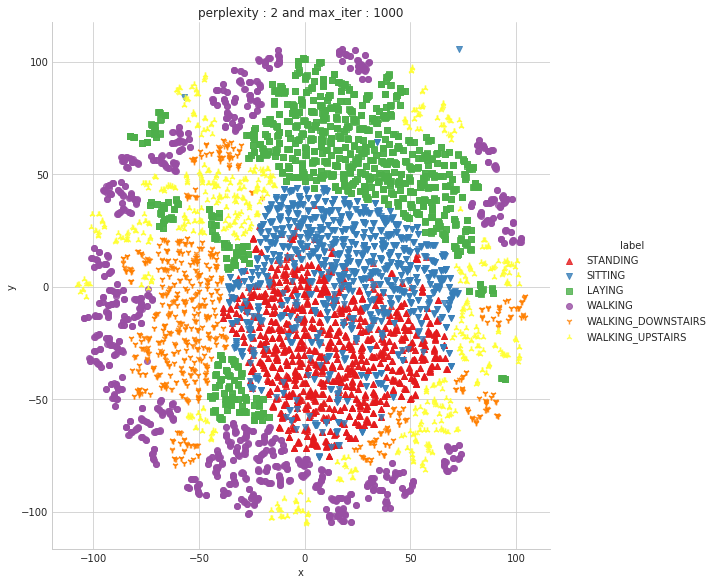

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.406s...
[t-SNE] Computed neighbors for 7352 samples in 43.849s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 113.9782181, gradient norm = 0.0212494 (50 iterations in 6.928s)
[t-SNE] Iteration 100: error = 97.5123672, gradient norm = 0.0167700 (50 iteratio

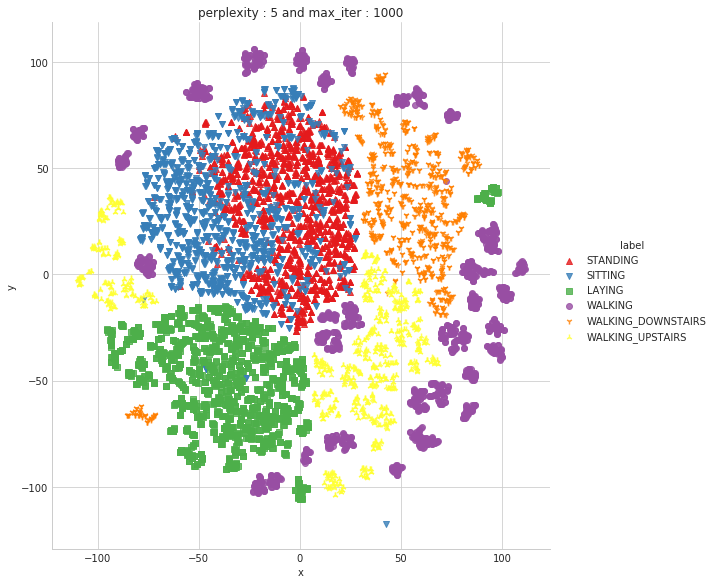

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.395s...
[t-SNE] Computed neighbors for 7352 samples in 41.711s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.125s
[t-SNE] Iteration 50: error = 105.9651413, gradient norm = 0.0154972 (50 iterations in 6.046s)
[t-SNE] Iteration 100: error = 90.4259186, gradient norm = 0.0102293 (50 iterati

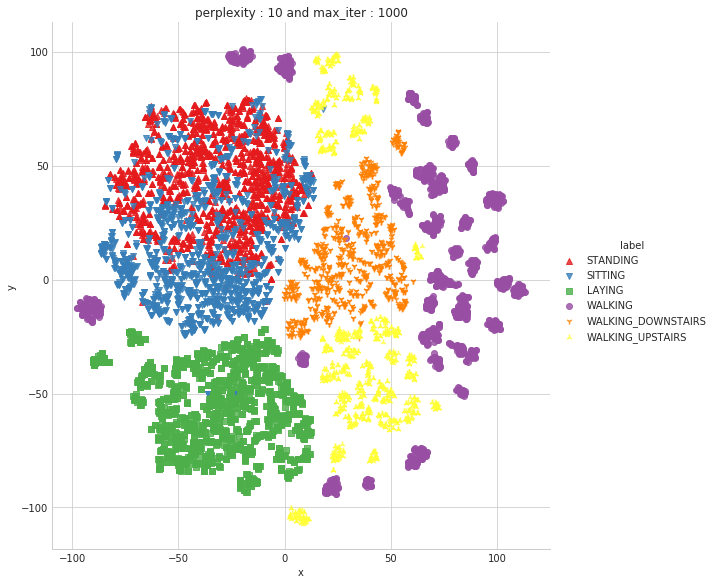

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.507s...
[t-SNE] Computed neighbors for 7352 samples in 45.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.250s
[t-SNE] Iteration 50: error = 97.9639053, gradient norm = 0.0126563 (50 iterations in 5.988s)
[t-SNE] Iteration 100: error = 84.0959625, gradient norm = 0.0064634 (50 iteratio

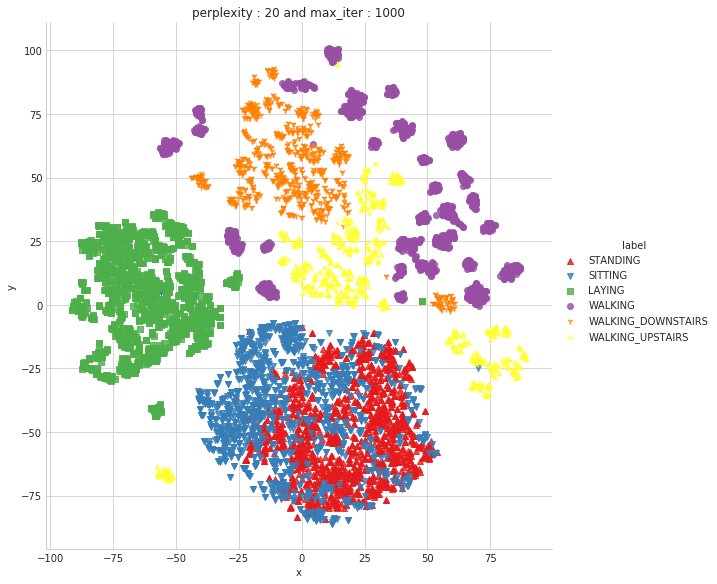

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.375s...
[t-SNE] Computed neighbors for 7352 samples in 45.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.625s
[t-SNE] Iteration 50: error = 86.4487762, gradient norm = 0.0228421 (50 iterations in 7.606s)
[t-SNE] Iteration 100: error = 75.5613785, gradient norm = 0.0044839 (50 iterati

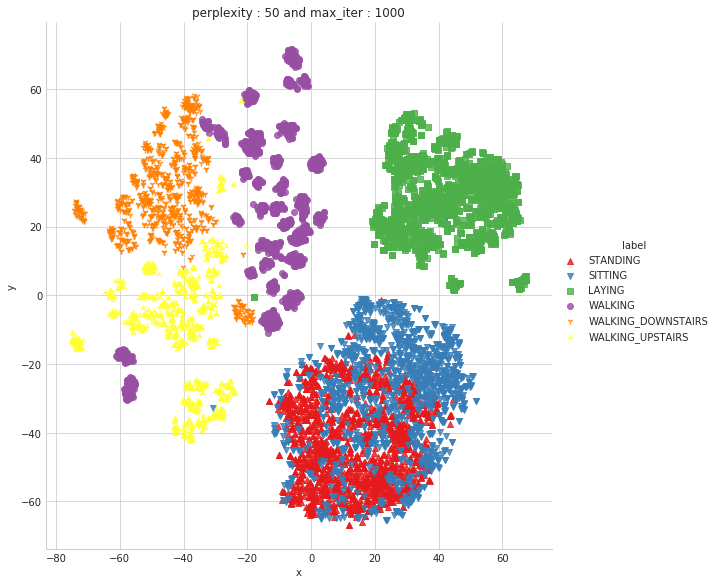

Done


In [27]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

### observations
    1. After plotting TSNE using dimensionality reduction, We find that the labels are easily seperable.
    2. However sitting and standing are somewhat overlapping.

In [28]:
import numpy as np
import pandas as pd

## Obtain the train and test data

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [30]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [31]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [32]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [33]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [34]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [35]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [36]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [37]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

# 1. Logistic Regression with Grid Search

In [38]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.8min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:59.716911


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


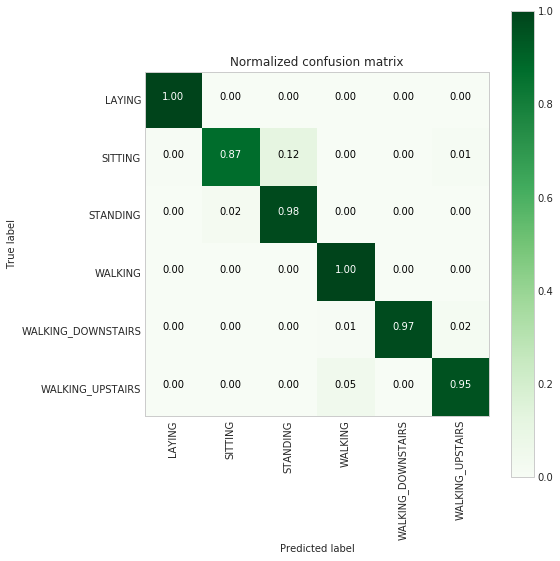

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [39]:

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)


### Observation
    1. We did our traininig using logistic regression.
    2. We get an accuracy of 0.96.
    3. The confusion shows minor error in sitting and standing.
    4. Majority of the classes are well seperated.

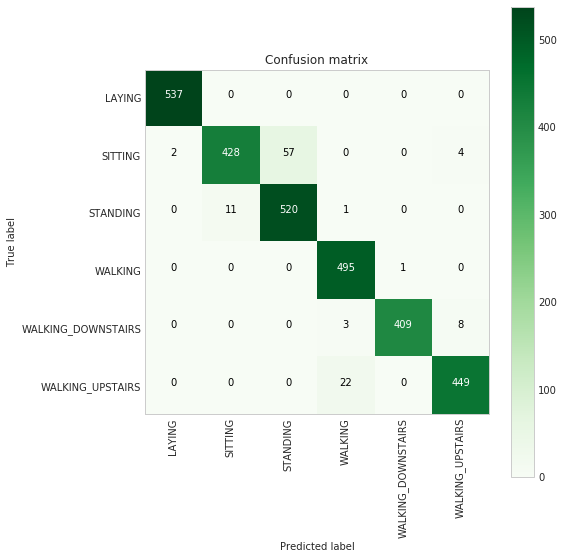

In [40]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [41]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9458650707290533



#  2. Linear SVC with GridSearch

In [42]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   42.0s finished
C:\Users\chana\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:48.303751


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9650492025788938


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 423  62   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


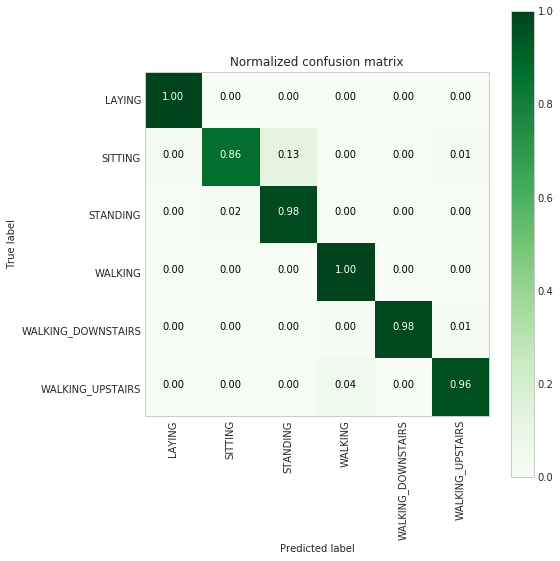

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

         micro avg       0.97      0.97      0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947



In [43]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

### Observation
    1. We did our traininig using Linear SVC.
    2. We get an accuracy of 0.96.
    3. The confusion shows minor error in sitting and standing.
    4. Majority of the classes are well seperated.

In [44]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9468171926006529



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:07:16.418361


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.628736


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


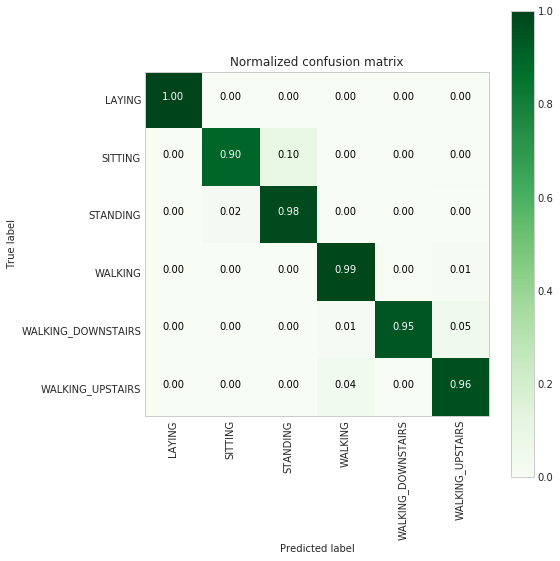

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [45]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

### Observation
    1. We did our traininig using Kernel SVM.
    2. We get an accuracy of 0.96.
    3. The confusion shows minor error in sitting and standing.
    4. Majority of the classes are well seperated.

In [46]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:13.416165


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006506


---------------------
|      Accuracy      |
---------------------

    0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  14 345  61]
 [  0   0   0  73  29 369]]


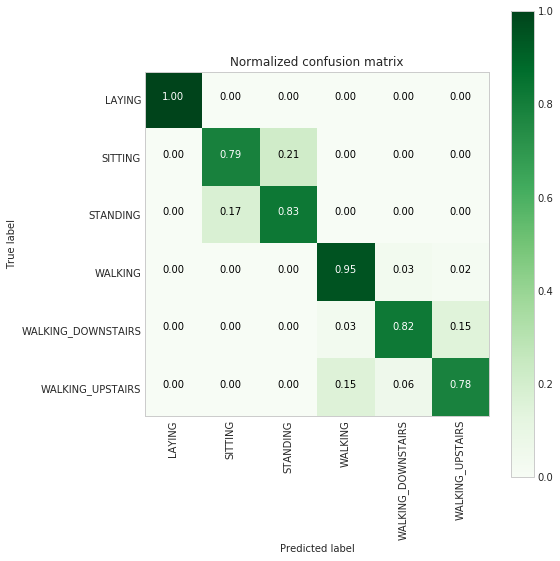

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

         micro avg       0.86      0.86      0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_spl

In [47]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

### Observation
    1. We did our traininig using decision Trees.
    2. We get a very low  accuracy of 0.84.
    3. The confusion shows minor error in sitting and standing.
    4. Majority of the classes are well seperated.

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:08:17.801054


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.063677


---------------------
|      Accuracy      |
---------------------

    0.9192399049881235


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 428  63   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 483  11   2]
 [  0   0   0  35 336  49]
 [  0   0   0  29   6 436]]


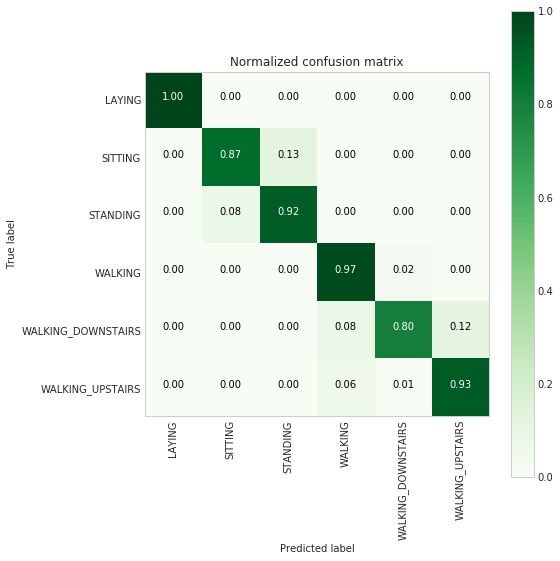

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.87      0.89       491
          STANDING       0.89      0.92      0.90       532
           WALKING       0.88      0.97      0.93       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.93      0.91       471

         micro avg       0.92      0.92      0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=

In [48]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

### Observation
    1. We did our traininig using random forest classifier.
    2. We get an accuracy of 0.91.
    3. The confusion shows minor error in sitting and standing.
    4. Majority of the classes are well seperated.

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 1:04:58.110645


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.110799


---------------------
|      Accuracy      |
---------------------

    0.9216152019002375


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 398  91   0   0   2]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  34   6 430]]


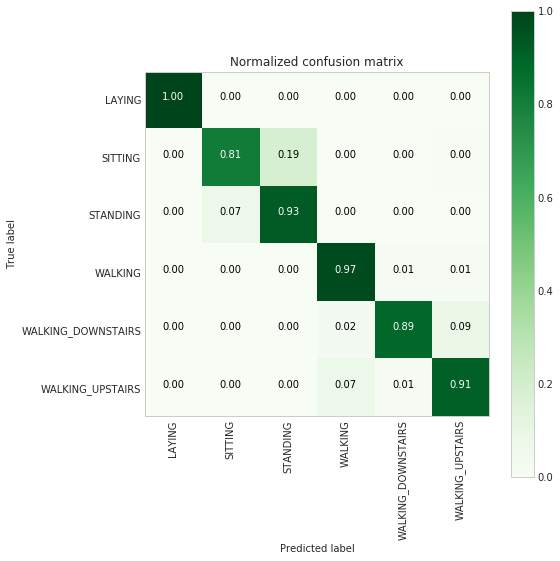

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.94       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.91      0.91       471

         micro avg       0.92      0.92      0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_s

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

### Observation
    1. We did our traininig using Gradient boosted decision trees.
    2. We get an accuracy of 0.92.
    3. The confusion shows minor error in sitting and standing.
    4. Majority of the classes are well seperated.


# 7. Comparing all models

In [50]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.5%       3.495% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.43%      13.57% 
Random Forest       : 91.92%      8.076% 
GradientBoosting DT : 91.92%      8.076% 


In [3]:
import warnings
warnings.filterwarnings("ignore")
a1= pd.read_csv("body_acc_x_train.txt", delim_whitespace=True, header=None).as_matrix()
a2= pd.read_csv("body_acc_y_train.txt", delim_whitespace=True, header=None).as_matrix()
a3= pd.read_csv("body_acc_z_train.txt", delim_whitespace=True, header=None).as_matrix()
a4= pd.read_csv("body_gyro_x_train.txt", delim_whitespace=True, header=None).as_matrix()
a5= pd.read_csv("body_gyro_y_train.txt", delim_whitespace=True, header=None).as_matrix()
a6= pd.read_csv("body_gyro_z_train.txt", delim_whitespace=True, header=None).as_matrix()
a7= pd.read_csv("total_acc_x_train.txt", delim_whitespace=True, header=None).as_matrix()
a8= pd.read_csv("total_acc_y_train.txt", delim_whitespace=True, header=None).as_matrix()
a9= pd.read_csv("total_acc_z_train.txt", delim_whitespace=True, header=None).as_matrix()

b1= pd.read_csv("body_acc_x_test.txt", delim_whitespace=True, header=None).as_matrix()
b2= pd.read_csv("body_acc_y_test.txt", delim_whitespace=True, header=None).as_matrix()
b3= pd.read_csv("body_acc_z_test.txt", delim_whitespace=True, header=None).as_matrix()
b4= pd.read_csv("body_gyro_x_test.txt", delim_whitespace=True, header=None).as_matrix()
b5= pd.read_csv("body_gyro_y_test.txt", delim_whitespace=True, header=None).as_matrix()
b6= pd.read_csv("body_gyro_z_test.txt", delim_whitespace=True, header=None).as_matrix()
b7= pd.read_csv("total_acc_x_test.txt", delim_whitespace=True, header=None).as_matrix()
b8= pd.read_csv("total_acc_y_test.txt", delim_whitespace=True, header=None).as_matrix()
b9= pd.read_csv("total_acc_z_test.txt", delim_whitespace=True, header=None).as_matrix()

x_train=np.transpose([a1,a2,a3,a4,a5,a6,a7,a8,a9], (1, 2, 0))
x_test=np.transpose([b1,b2,b3,b4,b5,b6,b7,b8,b9], (1, 2, 0))

y_train=pd.get_dummies(pd.read_csv("y_train.txt", delim_whitespace=True, header=None)[0]).as_matrix()
y_test=pd.get_dummies(pd.read_csv("y_test.txt", delim_whitespace=True, header=None)[0]).as_matrix()




In [4]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [5]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)




In [6]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [7]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [8]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [9]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [10]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [11]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))
print(n_classes)

128
9
7352
6


## hyper parameter tuning

In [14]:
def SCV(x,y,x1,y1): #function for simple cross validation and calculation of auc for different alphas   
    from sklearn.metrics import roc_curve, auc
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import roc_auc_score
    from matplotlib import pylab
    import seaborn as sns
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from sklearn.ensemble import RandomForestClassifier
    import xgboost as xgb
    #from sklearn.calibration import CalibratedClassifierCV 
    import math
    import numpy as np
    # Importing tensorflow
    np.random.seed(42)
    import tensorflow as tf
    tf.set_random_seed(42)
    # Configuring a session
    session_conf = tf.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )
    # Import Keras
    from keras import backend as K
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    K.set_session(sess)
    # Importing libraries
    from keras.models import Sequential
    from keras.layers import LSTM
    from keras.layers.core import Dense, Dropout
    timesteps = len(x_train[0])
    input_dim = len(x_train[0][0])

    train = []
    test = []

    #k1 = np.arange(0,2,0.0001)
    layers= [16,32,64,128,256]
    N=[0.1,0.3,0.5]
    for n_hidden in tqdm(layers):
        train111=[]
        test111=[]
        for i in N:  
            # Initiliazing the sequential model
            model = Sequential()
            # Configuring the parameters
            model.add(LSTM(n_hidden, input_shape=(128, 9)))
            # Adding a dropout layer
            model.add(Dropout(i))
            # Adding a dense output layer with sigmoid activation
            model.add(Dense(n_classes, activation='sigmoid'))
            # Compiling the model
            model.compile(loss='categorical_crossentropy',
                          optimizer='rmsprop',
                          metrics=['accuracy'])
            # Training the model
            model.fit(x,y,batch_size=batch_size,validation_data=(x1, y1),epochs=23,verbose=0)
            score = model.evaluate(x1, y1,verbose=0)
            score1= model.evaluate(x, y,verbose=0)
            train111.append(score1[1])
            test111.append(score[1])
            
        train.append(train111)
        test.append(test111)

    import numpy as np
    import pandas as pd
    train= np.array(train)
    test= np.array(test)
    train1= train.reshape(len(layers), len(N))
    #print(train1.shape)
    cv1= test.reshape(len(layers), len(N))
    train2= pd.DataFrame(train1, index=layers, columns= N)
    train2=train2.reindex(index=train2.index[::-1])
    cv2= pd.DataFrame(cv1, index=layers, columns= N)
    cv2=cv2.reindex(index=cv2.index[::-1])
    #print(cv1.shape)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.heatmap(train2, annot= True)
    plt.xlabel("Dropout rate")
    plt.ylabel("Hidden layers")
    plt.title("Accuracy")
    #plt.yticks(np.arange(len(n_estimator)), n_estimator)
    #plt.xticks(np.arange(len(max_depths)), max_depths)
    plt.subplot(1,2,2)
    #plt.yticks(np.arange(len(n_estimator)), n_estimator)
    #plt.xticks(np.arange(len(n_estimator)), max_depths)
    sns.heatmap(cv2, annot= True)
    plt.xlabel("Dropout rate")
    plt.ylabel("Hidden layers")
    plt.title("Accuracy")
    plt.suptitle("Simple cross validation to find optimal hyperparameters")
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [8:37:32<00:00, 7732.13s/it]


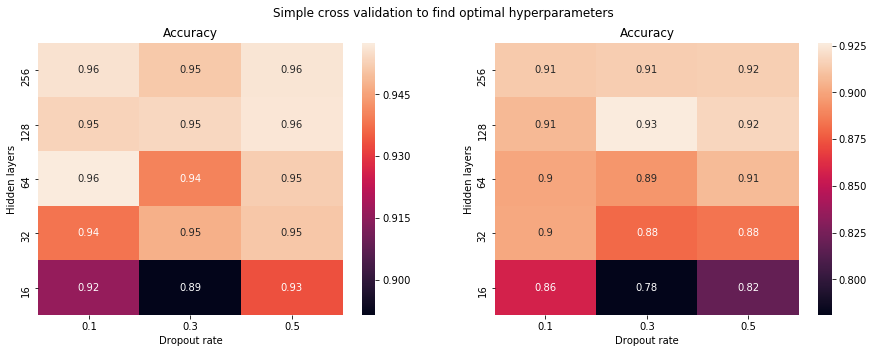

In [15]:
SCV(x_train,y_train,x_test,y_test)

### Observations
    1. We obtained different values of accuracy with hyperparameter tunings using train and test.
    2. The parameters we used here are drop out and hidden layers.
    3. We obtain best accuracy for hidden_layers=128 and dropout=0.3 

In [13]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 128
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.3))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)
score = model.evaluate(x_test, y_test)

128
9
7352
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 71,430
Trainable params: 71,430
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 86s 12ms/step - loss: 1.2621 - acc: 0.4421 - val_loss: 1.1126 - val_acc: 0.5389
Epoch 2/30
7352/7352 [==============================] - 99s 13ms/step - loss: 0.9958 - acc: 0.5665 - val_loss: 0.9931 - val_acc: 0.5439
Epoch 3/30
7352/7352 [==============================] - 101s 14ms/step 

In [17]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
print(confusion_matrix(y_test, model.predict(x_test)))
print("The logloss is {} and accuracy of the model is {}".format(np.round(score[0],2),np.round(score[1],2)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  0      415        75        0                   0   
STANDING                 0       77       455        0                   0   
WALKING                  0        3         2      457                  32   
WALKING_DOWNSTAIRS       0        1         0        2                 406   
WALKING_UPSTAIRS         0        0         2        2                   0   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING                            2  
WALKING_DOWNSTAIRS                11  
WALKING_UPSTAIRS                 467  
The logloss is 0.3 and accuracy of the model is 0.93


In [13]:
def SCV(x,y,x1,y1): #function for simple cross validation and calculation of auc for different alphas   
    from sklearn.metrics import roc_curve, auc
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import roc_auc_score
    from matplotlib import pylab
    import seaborn as sns
    import matplotlib.pyplot as plt
    from tqdm import tqdm
    from sklearn.ensemble import RandomForestClassifier
    import xgboost as xgb
    #from sklearn.calibration import CalibratedClassifierCV 
    import math
    import numpy as np
    # Importing tensorflow
    np.random.seed(42)
    import tensorflow as tf
    tf.set_random_seed(42)
    # Configuring a session
    session_conf = tf.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )
    # Import Keras
    from keras import backend as K
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    K.set_session(sess)
    # Importing libraries
    from keras.models import Sequential
    from keras.layers import LSTM
    from keras.layers.core import Dense, Dropout
    timesteps = len(x_train[0])
    input_dim = len(x_train[0][0])

    train = []
    test = []
    n_hidden=128
    #k1 = np.arange(0,2,0.0001)
    layers= [0.1,0.3,0.5]
    N=[0.1,0.3,0.5]
    for j in tqdm(layers):
        train111=[]
        test111=[]
        for i in N:  
            # Initiliazing the sequential model
            model = Sequential()
            # Configuring the parameters
            model.add(LSTM(n_hidden,return_sequences=True, input_shape=(128, 9)))
            # Adding a dropout layer
            model.add(Dropout(j))
            model.add(LSTM(n_hidden, input_shape=(128, 9)))
            model.add(Dropout(i))
            # Adding a dense output layer with sigmoid activation
            model.add(Dense(n_classes, activation='sigmoid'))
            # Compiling the model
            model.compile(loss='categorical_crossentropy',
                          optimizer='rmsprop',
                          metrics=['accuracy'])
            # Training the model
            model.fit(x,y,batch_size=batch_size,validation_data=(x1, y1),epochs=23,verbose=0)
            score = model.evaluate(x1, y1,verbose=0)
            score1= model.evaluate(x, y,verbose=0)
            train111.append(score1[1])
            test111.append(score[1])
            
        train.append(train111)
        test.append(test111)

    import numpy as np
    import pandas as pd
    train= np.array(train)
    test= np.array(test)
    train1= train.reshape(len(layers), len(N))
    #print(train1.shape)
    cv1= test.reshape(len(layers), len(N))
    train2= pd.DataFrame(train1, index=layers, columns= N)
    train2=train2.reindex(index=train2.index[::-1])
    cv2= pd.DataFrame(cv1, index=layers, columns= N)
    cv2=cv2.reindex(index=cv2.index[::-1])
    #print(cv1.shape)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.heatmap(train2, annot= True)
    plt.xlabel("Dropout rate in second layer")
    plt.ylabel("Dropout rate in first layer")
    plt.title("Ac curacy on train data")
    #plt.yticks(np.arange(len(n_estimator)), n_estimator)
    #plt.xticks(np.arange(len(max_depths)), max_depths)
    plt.subplot(1,2,2)
    #plt.yticks(np.arange(len(n_estimator)), n_estimator)
    #plt.xticks(np.arange(len(n_estimator)), max_depths)
    sns.heatmap(cv2, annot= True)
    plt.xlabel("Dropout rate in second layer")
    plt.ylabel("Dropout rate in first layer")
    plt.title("Accuracy on test data")
    plt.suptitle("Simple cross validation to find optimal hyperparameters")
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 3/3 [13:01:35<00:00, 15573.40s/it]


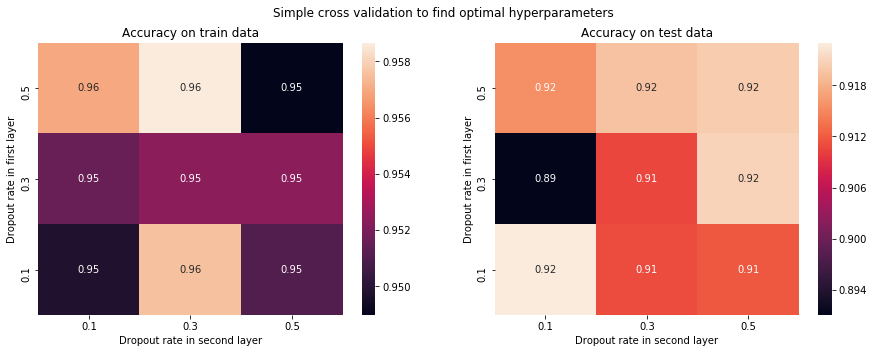

In [14]:
SCV(x_train,y_train,x_test,y_test)

#### when we ran the same code simultaneously using 10 epochs on google colab the results obtained are below:
<img src="download.png">

### Observations
    1. Here we have used two layer lstm architecture.
    2. The parameters here are dropout rate of layer 1 and layer 2.
    3. The best value of accuracy is obtained for layer 1=0.1 and layer=0.5 for 10 epochs

In [12]:
# Initializing parameters
epochs = 10
batch_size = 16
n_hidden = 128
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden,return_sequences=True, input_shape=(128, 9)))
# Adding a dropout layer
model.add(Dropout(0.1))
model.add(LSTM(n_hidden, input_shape=(128, 9)))
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Training the model
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)
score = model.evaluate(x_test, y_test)
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
print(confusion_matrix(y_test, model.predict(x_test)))
print("The logloss is {} and accuracy of the model is {}".format(np.round(score[0],2),np.round(score[1],2)))

128
9
7352
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 128)          70656     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 203,014
Trainable params: 203,014
Non-trainable params: 0
_________________________________________________________________
Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 221s 30ms/step - loss

## Summary

In [13]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()
x.field_names = ["Model","Layers","drop out rate","hidden_layers","epochs","Train accuracy", "Test accuracy"]

x.add_row(["LSTM","1","0.3","128","10", 0.95, 0.93])
x.add_row(["LSTM","2","0.1 and 0.5", "128","10", 0.95, 0.93])




print(x)

+-------+--------+---------------+---------------+--------+----------------+---------------+
| Model | Layers | drop out rate | hidden_layers | epochs | Train accuracy | Test accuracy |
+-------+--------+---------------+---------------+--------+----------------+---------------+
|  LSTM |   1    |      0.3      |      128      |   10   |      0.95      |      0.93     |
|  LSTM |   2    |  0.1 and 0.5  |      128      |   10   |      0.95      |      0.93     |
+-------+--------+---------------+---------------+--------+----------------+---------------+


### Conclusion
    1. We solved the case study Human activity recognition
    2. Intially We've explored the data with pre extracted features and found various insights.
    3. Next, we have trained various ML models using these pre-extracted features 
    4. The models obtained performed decently.
    5. Next, We used the original features to train our deep learning models.
    6. First we did hyperparameter tuning for single layered lstm model with drop out rates and number of hidden layers.
    7. Next,we obtained the optimal hidden layer and used it in the 2 layer lstm architecture.
    8. Now, we did hyperparameter tunings in two layer lstm architecture using the two drop out rates.
    9. Finally We obtained the optimal hyperparamters.
    10. We find that with 2 layer architecture, the model achieved high accuracy with only 10 epochs.